<a href="https://colab.research.google.com/github/YusufWong/-YusufWong-CS448-Assignment3/blob/main/Yusuf%20Wong%20-%20Assignment%20%233.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# My Pokemon Linear Regression & k-NN Classification Notebook!
### By: Yusuf Wong

## Abstract
* For both Linear Regression **and** KNN (k-nearest neighbor) Classification, I've chosen to use this Pokemon dataset that I found online: https://www.kaggle.com/abcsds/pokemon **(Credits to Alberto Barradas for supplying this data for the community!)**
<br> 

* I chose this dataset because I absolutely love Pokemon (esp. PokemonGO!) and I thought it'd be a cool project to add to my resume and discuss with a recruiter/hiring manager (to show my personality/interests etc).  
<br> 

* This Pokemon Dataset has stats information related to each Pokemon from Generations 1-6. This includes: Name, #, Type(s), HP, Attack, Defense, Special Attack, Special Defense, Speed, Generation #, and Boolean indicator for Legendary.
<br> 

* For this project, however, I intend to only focus on **Attack**, **Defense**, & **Type stats** for regression and classification sections. I plan to analyze if there is a linear relationship between a Pokemon's Attack and Defense stats to predict a Pokemon's Defense values for any given Attack value. I also plan to use k-Nearest Neighbors classification to attempt to classify different Pokemon Types (i.e. grass, water, fire, etc) soly based on Attack and Defense Attributes. More info to come soon!
<br> 

* From this dataset, I hope to learn how to use dataframes from the Pandas library to read, interpret, and manipulate (i.e. split) data for my advantage. I also plan to learn how to use the matplotlib library to learn how to visualize and analyze my data. Finally, I plan to learn how to utilize the sklearn libraries for both regression and classification analysis, as well as experience first hand how to use machine learning to train my model with training data, test my model with the testing data, and investiage the accuracy/error rate of the model.

##  <span style="color:darkgreen">Section 1: Regression Dataset Prep</span> 

**As mentioned before, this Pokemon Dataset has different columns of stats/info: <span style="color:red">Name, #, Type(s), HP, Attack, Defense, Special Attack, Special Defense, Speed, Generation #, and a Boolean indicator for Legendary.</span>** 

**See/Run the code below to see the head of the data. You can change the # of rows of data you'd like to see by inserting a number in Pokemon.head('#'). Remove the '.head(#)' to see all of the data!**



In [1]:
import pandas as pd
pd.set_option('display.max_rows', None)
url = 'https://raw.githubusercontent.com/YusufWong/-YusufWong-CS448-Assignment3/main/Pokemon.csv'
Pokemon = pd.read_csv(url)#,index_col=0) #"Pokemon.csv")
#Note: there are 721 different Pokemon among the 6 generations from this dataset. 
#Feel free to change this line of code to see all of them!
Pokemon.head(20) 

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


#### <span style="color:red">NOTE:</span>  There are more entries than Pokemon # because some Pokemon #'s repeat (for Mega Pokemon). For example, Venusaur and MEGA Venusaur both have the same Pokemon #, but the data is representing them as SEPARATE entities.

### For linear regression, I ONLY intend to focus on the quantitative Attack and Defense stats/columns to investigate if there is a linear relationship between these Pokemon attributes. Here is the head of the dataframe of the two sets of data I plan to use: 

In [2]:
df_lr = Pokemon[["Attack", "Defense"]] #dataframe just for attack and defense
print("Here is the head of the first 10 rows of the dataframe:\n")
print("%s\n" % df_lr.head(10))
print("The totallength of this dataframe is: %s rows of Attack & Defense values" % (len(df_lr)))


Here is the head of the first 10 rows of the dataframe:

   Attack  Defense
0      49       49
1      62       63
2      82       83
3     100      123
4      52       43
5      64       58
6      84       78
7     130      111
8     104       78
9      48       65

The totallength of this dataframe is: 800 rows of Attack & Defense values


##  <span style="color:darkgreen">Section 2: Linear Regression</span> 

### Splitting the data into training (66%) & testing sets (34%):

In [3]:
from sklearn.model_selection import train_test_split
Attack, Defense = df_lr["Attack"].values.reshape(-1,1), df_lr["Defense"].values.reshape(-1,1)

#Note to Self: random_state = # to select for consistent randomization of splitting data into train and test sets
# i.e. picking the same random_state will yield the same randomized data set every time that number is selected
#Shuffle=true to randomize data (if not specified, default == True)
train_size = 0.66; #Use 66% of total data for training, rest is used for testing
Attack_train, Attack_test, Defense_train, Defense_test = train_test_split(Attack,Defense, shuffle=True, test_size=(1-train_size), random_state=42)



### Fitting & Visualizing Linear Regression Model onto training set:

Training/Total = 0.66
Linear Reg model: y = 0.4262776028919098x + 39.567234580378084
error_train = 0.19336435328007595
error_test = 0.18778744089286303


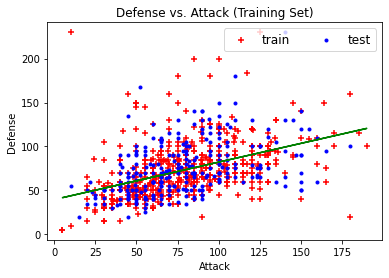

In [4]:
from sklearn.linear_model import LinearRegression
lr_train = LinearRegression().fit(Attack_train,Defense_train)
#clf = svm.SVC(kernel='linear', C=1).fit([Attack_train], [Defense_train])
#Attack_Defense_Linear_Regression.score(Attack_train,Defense_train)
Defense_predict = lr_train.predict(Attack_test)

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(1, 1), dpi=5000)
%matplotlib inline
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.title("Defense vs. Attack (Training Set)")
train = plt.scatter(Attack_train,Defense_train,color='red',marker='+')
test = plt.scatter(Attack_test,Defense_test,color='blue',marker='.')

best_fit = plt.plot(Attack_train, lr_train.predict(Attack_train), color = "green")

plt.legend((train, test,),
           ('train', 'test'),
           scatterpoints=1,
           loc='upper right',
           ncol=3,
           fontsize=12)

#plt.legend()
#Using Training Set
print("Training/Total = %s" % (train_size))
b = float(lr_train.intercept_)
m = float(lr_train.coef_)
print("Linear Reg model: y = %sx + %s" % (m,b))
error_training = lr_train.score(Attack_train, Defense_train)
print("error_train = %s" % (error_training))
error_test = lr_train.score(Attack_test, Defense_test)
print("error_test = %s" % (error_test))

### Error Rate

In [5]:
print("Training/Total = %s" % (train_size))
b = float(lr_train.intercept_)
m = float(lr_train.coef_)
print("Linear Reg model: y = %sx + %s" % (m,b))
error_training = lr_train.score(Attack_train, Defense_train)
print("error_train = %s" % (error_training))
error_test = lr_train.score(Attack_test, Defense_test)
print("error_test = %s" % (error_test))

Training/Total = 0.66
Linear Reg model: y = 0.4262776028919098x + 39.567234580378084
error_train = 0.19336435328007595
error_test = 0.18778744089286303


* The error rates for both the training set and the test set represent the R^2 value that's often used during linear regression. If there was a perfect dataset where there exists a line that can perfectly go through *ALL* of the datapoint, then this R^2 = 1. However, this is clearly *NOT* the case here, since the error rates are approx 0.19 for both the training and test sets. At first glance, this linear model doesn't fit well with the data.
<br>

* However, THIS IS ACTUALLY A GOOD THING! An important thing to notice is that the Attack and Defense values are only integers and the range of values for Attack are between approximately between 0->175ish. **IF** there was a perfect line of best fit (i.e. R^2 = 1), then there would only be 175 corresponding Defense Values that perfectly fit on that line, which would be impossible if you want to create a diverse Pokemon universe with different qualities and characteristics, especially when it comes to Attack and Defense. In other words, the smaller the R^2 value, the more diversity and variation you get, which makes the game more interesting, especially if you add other attributes such as HP, Sp. Attack/Defense, Speeds, and movesets (which are not included in this dataset). Thus, it's actually better that there ISN'T a strong linear relationship between these two quantitative datasets!<br>

## <span style="color:darkgreen">Section 3: Classification Dataset Prep</span> 

### I plan to use the same Pokemon dataset for classification. I plan to use the different types (i.e. grass, poison, fire, water, bug, etc.) to classify the different Pokemon based on the Attack and Defense quantitative data sets. Here is the head of the first 20 Pokemons as a reminder:

In [6]:
Pokemon.head(20) #Note: a number can be inserted (i.e. ".head(#)"), to find any first # of rows of the dataset

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


#### It's important to see that not all Types are created equal if I use either column "Type 1" or "Type 2". Each Pokemon listed has a Type 1, but not every Pokemon has a Type 2. If I want to equally represent this Pokemon universe's qualitative dataset, this data needs to be prepped.

### Because some pokemon can have two types, I initially separated the Pokemon Data into 2 parts: Type 1 & Type 2. Here is the head of the list of Pokemon who have Type 1 (basically all of them).

In [7]:
Type_1 = Pokemon[["Name", "Type 1", "Attack", "Defense"]]
Type_1.head(20)

,Name,Type 1,Attack,Defense
0,Bulbasaur,Grass,49,49
1,Ivysaur,Grass,62,63
2,Venusaur,Grass,82,83
3,VenusaurMega Venusaur,Grass,100,123
4,Charmander,Fire,52,43
5,Charmeleon,Fire,64,58
6,Charizard,Fire,84,78
7,CharizardMega Charizard X,Fire,130,111
8,CharizardMega Charizard Y,Fire,104,78
9,Squirtle,Water,48,65


### Here is the head of the list of all Pokemon that also have a 2nd Type (I used the function ".notna()" to only select rows that DON'T have null values):

In [8]:
Type_2 = Pokemon[Pokemon["Type 2"].notna()] #i.e. Type 2 == NOT null
Type_2 = Type_2[["Name", "Type 2", "Attack", "Defense"]]
Type_2.head(10)


,Name,Type 2,Attack,Defense
0,Bulbasaur,Poison,49,49
1,Ivysaur,Poison,62,63
2,Venusaur,Poison,82,83
3,VenusaurMega Venusaur,Poison,100,123
6,Charizard,Flying,84,78
7,CharizardMega Charizard X,Dragon,130,111
8,CharizardMega Charizard Y,Flying,104,78
15,Butterfree,Flying,45,50
16,Weedle,Poison,35,30
17,Kakuna,Poison,25,50


#### You'll notice by now that I separated the dataset into two different parts so that Pokemon like Bulbasaur can be represented twice: Attack/Defense Values for Grass AND Poison (for equal representation). 

### Now it's time to concatenate the two datasets. I also created two new columns called "Type" and "Type Numeric" that will read the information from Type 1 and Type 2 columns and convert them to the appropiate strings/ints I need. 

In [9]:
All_Types = pd.concat([Type_1, Type_2])
import numpy as np
All_Types = All_Types.replace(np.nan, '', regex=True)
All_Types["Type"] = All_Types["Type 1"].astype(str) + All_Types["Type 2"].astype(str)
All_Types["Type_Numeric"] = All_Types["Type"] #Copy String Values to Numeric Column temporarily 
All_Types = All_Types[["Name", "Attack", "Defense","Type","Type_Numeric"]] #Isolate columns of interest
All_Types.head(20)
#All_Types.tail(50)
#height = 5
#print(All_Types.head(height))
#print(All_Types.loc[[800]])

,Name,Attack,Defense,Type,Type_Numeric
0,Bulbasaur,49,49,Grass,Grass
1,Ivysaur,62,63,Grass,Grass
2,Venusaur,82,83,Grass,Grass
3,VenusaurMega Venusaur,100,123,Grass,Grass
4,Charmander,52,43,Fire,Fire
5,Charmeleon,64,58,Fire,Fire
6,Charizard,84,78,Fire,Fire
7,CharizardMega Charizard X,130,111,Fire,Fire
8,CharizardMega Charizard Y,104,78,Fire,Fire
9,Squirtle,48,65,Water,Water


#### It's important to note that a lot of Pokemon get duplicated, which is fine because most have dual types.

### Now to see the unique Types of Pokemon and create a Numeric list of integer to map them:

In [10]:
List_Type = sorted(set(All_Types.Type.unique())) #Note: We're alphabetically sorting the list of strings
print("There are %s different Pokemon Types: \n\n" % (len(List_Type)), List_Type)

List_Numeric = list(range(1,len(All_Types.Type.unique())+1 ))
print("\nList_Num = ",List_Numeric)

There are 18 different Pokemon Types: 

 ['Bug', 'Dark', 'Dragon', 'Electric', 'Fairy', 'Fighting', 'Fire', 'Flying', 'Ghost', 'Grass', 'Ground', 'Ice', 'Normal', 'Poison', 'Psychic', 'Rock', 'Steel', 'Water']

List_Num =  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]


### Now to modify the Type_Numeric Column to MAP each string Type to the corresponding numeric integer (up until this point, this is the FINAL modification to the dataset, and I'll be using information from here to conduct my classification):

In [11]:
#result = map(List_Types,List_Num)
#print(result)
#All_Types.replace("Type_Numeric":result) # = All_Types["Type_Numeric"]
All_Types["Type_Numeric"].replace(List_Type,List_Numeric,inplace=True, limit=None, regex=True)
All_Types.head(50)

,Name,Attack,Defense,Type,Type_Numeric
0,Bulbasaur,49,49,Grass,10
1,Ivysaur,62,63,Grass,10
2,Venusaur,82,83,Grass,10
3,VenusaurMega Venusaur,100,123,Grass,10
4,Charmander,52,43,Fire,7
5,Charmeleon,64,58,Fire,7
6,Charizard,84,78,Fire,7
7,CharizardMega Charizard X,130,111,Fire,7
8,CharizardMega Charizard Y,104,78,Fire,7
9,Squirtle,48,65,Water,18


## <span style="color:darkgreen">Section 4: Classification (Finally!)</span> 

### Time to allocate "x" as the quantitate array of datasets (i.e. Attack & defense) and "y" as the qualative data that's numerically represented in integer form, as well as splitting these x & y datasets:

In [12]:
x = All_Types.iloc[:,1:3] #NOTE: we are representing the quantitative data(s) as x
y = All_Types.iloc[:,4] #Note: we are representing the QUALITATIVE data as y (in integer-form!)
#y=y.astype('int') 
#x, y = All_Types["Attack"].values.reshape(-1,1), All_Types["Defense"].values.reshape(-1,1)
train_size = 0.5
x_train, x_test, y_train, y_test = train_test_split(x,y, shuffle=True, test_size=(1-train_size), random_state=42)

In [13]:
y

0      10
1      10
2      10
3      10
4       7
5       7
6       7
7       7
8       7
9      18
10     18
11     18
12     18
13      1
14      1
15      1
16      1
17      1
18      1
19      1
20     13
21     13
22     13
23     13
24     13
25     13
26     13
27     13
28     14
29     14
30      4
31      4
32     11
33     11
34     14
35     14
36     14
37     14
38     14
39     14
40      5
41      5
42      7
43      7
44     13
45     13
46     14
47     14
48     10
49     10
50     10
51      1
52      1
53      1
54      1
55     11
56     11
57     13
58     13
59     18
60     18
61      6
62      6
63      7
64      7
65     18
66     18
67     18
68     15
69     15
70     15
71     15
72      6
73      6
74      6
75     10
76     10
77     10
78     18
79     18
80     16
81     16
82     16
83      7
84      7
85     18
86     18
87     18
88      4
89      4
90     13
91     13
92     13
93     18
94     18
95     14
96     14
97     18
98     18
99      9


In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler #for scaling

knn = KNeighborsClassifier(n_neighbors=23, p=2) #p=1->metric='manhattan_dst', if p=2 -> metric='euclidean'
knn.fit(x_train, y_train) #.ravel())
#X_train
y_pred = knn.predict(x_test)
y_pred

array([10, 18, 18,  2,  6,  1,  6, 10, 10, 18, 10, 13,  1,  2,  2, 10, 15,
        3, 18, 10, 13,  2,  1,  1,  3, 15,  7, 10,  3,  2,  3, 13, 18, 13,
        6,  8,  3,  1, 14, 13, 13,  1, 16, 13,  1, 13,  8, 14, 13,  6, 15,
       15,  3, 11, 10,  8,  2, 13,  8, 18, 18, 10, 16, 15, 13, 10,  1,  5,
       17,  2,  2, 13, 13, 18, 10, 10, 13, 10, 15, 10, 15, 14, 10, 15, 10,
       18, 16, 10, 14,  6,  3, 18, 15, 15, 18, 10, 15, 15,  6, 18, 10, 13,
       15,  6,  8, 13, 13, 10, 16,  2, 10, 18,  2, 13,  3,  8,  2,  2,  2,
       10, 10,  6, 13, 13, 10,  6,  2, 13, 13,  3, 15, 10, 18, 14, 13, 10,
       10, 15,  8,  8, 18, 13, 13, 10,  3, 13, 10,  8, 13, 18, 13,  6, 18,
        1, 18,  2, 15, 15, 13,  6,  8,  2, 13,  8, 16, 13, 15,  6, 10, 13,
       13,  2, 13, 13, 10, 13, 10,  1,  6, 18, 13,  2,  6, 16, 15, 10,  6,
        6, 13, 10, 10, 15, 15, 18, 10, 13, 15, 10, 10, 15, 18, 15,  3, 15,
       13,  7, 15,  8,  1,  6,  6, 13,  7, 18, 18, 10, 13, 15, 15, 10,  6,
        2,  6, 10, 16,  6

In [15]:
from sklearn.metrics import classification_report, confusion_matrix
#print(confusion_matrix(y_test, y_pred))
#print(classification_report(y_test, y_pred))
import sklearn.metrics as metrics
metrics.f1_score(y_test, y_pred, labels=np.unique(y_pred))

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [ ]:
from sklearn.metrics import f1_score
print(f1_score(y_test,y_pred))

In [ ]:
from sklearn.metrics import accuracy_scoree
print(accuracy_score(y_test,y_pred))

In [ ]:
import math
math.sqrt(len(y_test))

## Conclusion

# ![](SquirtleMeme.jpg)

### Because there are 18 different types of Pokemon, I don't think it's wise to try to visualize it because I'd have to use different markers & colors that'll just make it messy

# EXTRAS-----------------------------------------------------------------------------------------

In [ ]:
print(len(Type_1))
print(len(Type_2))
print(len(All_Types))

#Pokemon_Dual_Type = Pokemon[Pokemon["Type 2"].notna()] #i.e. Type 2 == NOT null
#Pokemon_Dual_Type = Pokemon[Pokemon["Type 2"].notna()] #i.e. Type 2 == NOT null
#Pokemon_Dual_Type  
#Type_2 = Pokemon_Dual_Type[["Name", "Type 2", "Attack", "Defense"]]
#Type_2.head(100)
#Pokemon_Dual_Type = Pokemon[Pokemon["Type 2"].notna()] #i.e. Type 2 == NOT null


In [ ]:
from sklearn.metrics import r2_score
error= r2_score(Defense_test, Defense_predict)
print("Error = " % (error))
#error = lr.score(Attack_train, Defense_train)
#error
error

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(Attack_train,Defense_train)
error = lr.score(Attack_train, Defense_train)
error

In [ ]:
X = [[0], [1], [2], [3]]
y = [0, 0, 1, 1]
from sklearn.neighbors import RadiusNeighborsClassifier
neigh = RadiusNeighborsClassifier(radius=1.0)
neigh.fit(X, y)

print(neigh.predict([[1.5]]))

print(neigh.predict_proba([[1.0]]))

In [ ]:
#Pokemton_Attack_Defense_125 = Pokemon[(Pokemon["Attack"] >125) & (Pokemon["Defense"] >125)]
Pokemon_Single_Type = Pokemon[Pokemon["Type 2"].isnull()] #Type 2 IS null
Pokemon_Single_Type.head(20)
Pokemon_Dual_Type = Pokemon[Pokemon["Type 2"].notna()] #i.e. Type 2 == NOT null
Pokemon_Dual_Type.head(20)
Pokemon_Types_Total = pd.concat([Pokemon_Single_Type, Pokemon_Dual_Type])
Pokemon_Types_Total.tail(20)
Pokemon.dtypes


In [ ]:
All_Types.dtypes

In [ ]:
#Using Test Set
lr_test =  LinearRegression().fit(Attack_test,Defense_test)
error_test = lr_test.score(Attack_train, Defense_train)
print("error_test = %s" % (error_test))


In [ ]:
#print(All_Types.head(10))
#d = dict([(y,x+1) for x,y in enumerate(sorted(set(arr)))])
#All_Types['Type'] = All_Types['Type'].replace(All_Types['Type'].unique(),d)
#All_Types.head(10)


In [ ]:
All_Types.replace({"Type", d})

#### Splitting All_Types Data into Training & Test Sets:

In [ ]:
from sklearn.model_selection import train_test_split
Attack, Defense, Type =  All_Types["Attack"].values.reshape(-1,1), \
                         All_Types["Defense"].values.reshape(-1,1), \
                         All_Types["Type"].values.reshape(-1,1)
                        
#Note to Self: random_state = # to select for consistent randomization of splitting data into train and test sets
# i.e. picking the same random_state will yield the same randomized data set every time that number is selected
#Shuffle=true to randomize data (if not specified, default == True)
train_size = 0.66;
Attack_train, Attack_test, Defense_train, Defense_test, Type_train, Type_test = \
    train_test_split(Attack,Defense, Type, shuffle=True, test_size=(1-train_size), random_state=42)



#### EXAMPLE!!!! 

#### For both Linear Regression and KNN (k-nearest neighbor) Classification, I've chosen to use this Pokemon dataset that I found online: https://www.kaggle.com/abcsds/pokemon (Credits to Alberto Barradas for supplying this data for the community!)
#### I chose this dataset because I absolutely love Pokemon (esp. PokemonGO!) and I thought it'd be a cool project to add to my resume and discuss with a recruiter/hiring manager (to show my personality/interests etc).


    Talk about what datasets you've selected for your notebook
    Include why you choose these datasets
    Talk about the classification algorithm you plan to use
    Mention what you hope to find over the course of this notebook

I really like cats so I found a dataset on cats and decide to AI it up. I will use a Linear Regression to predict the duration of a cat nap based off tail length and Neural Network to classify cat breeds based off of their attributes.